# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [18]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import datetime as datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 578


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        weather_json = city_weather.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = weather_json['coord']['lat']
        city_lng = weather_json['coord']['lon']
        city_max_temp = weather_json['main']['temp_max']
        city_humidity = weather_json['main']['humidity']
        city_clouds = weather_json['clouds']['all']
        city_wind = weather_json['wind']['speed']
        city_country = weather_json['sys']['country']
        city_date = weather_json['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | thompson
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | invercargill
Processing Record 4 of Set 1 | taiohae
City not found. Skipping...
Processing Record 5 of Set 1 | kapa'a
Processing Record 6 of Set 1 | udachny
Processing Record 7 of Set 1 | motygino
Processing Record 8 of Set 1 | kodiak
Processing Record 9 of Set 1 | obo
Processing Record 10 of Set 1 | lake havasu city
Processing Record 11 of Set 1 | angaur state
Processing Record 12 of Set 1 | yellowknife
Processing Record 13 of Set 1 | edinburgh of the seven seas
Processing Record 14 of Set 1 | vorkuta
Processing Record 15 of Set 1 | waitangi
Processing Record 16 of Set 1 | princeton
Processing Record 17 of Set 1 | klyuchi
Processing Record 18 of Set 1 | ribeira grande
Processing Record 19 of Set 1 | la breita
Processing Record 20 of Set 1 | kargasok
Processing Record 21 of Set 1 | dudinka
Processing Record 2

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          552
Lat           552
Lng           552
Max Temp      552
Humidity      552
Cloudiness    552
Wind Speed    552
Country       552
Date          552
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,thompson,55.7435,-97.8558,284.24,54,40,3.09,CA,1715053783
1,port-aux-francais,-49.3500,70.2167,280.97,92,100,15.35,TF,1715053777
2,invercargill,-46.4000,168.3500,284.27,89,100,2.68,NZ,1715053776
3,kapa'a,22.0752,-159.3190,301.14,81,100,7.20,US,1715053782
4,udachny,66.4167,112.4000,272.84,98,98,11.30,RU,1715053797


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("Output_Weather/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("Output_Weather/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,thompson,55.7435,-97.8558,284.24,54,40,3.09,CA,1715053783
1,port-aux-francais,-49.3500,70.2167,280.97,92,100,15.35,TF,1715053777
2,invercargill,-46.4000,168.3500,284.27,89,100,2.68,NZ,1715053776
3,kapa'a,22.0752,-159.3190,301.14,81,100,7.20,US,1715053782
4,udachny,66.4167,112.4000,272.84,98,98,11.30,RU,1715053797


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [31]:
print({datetime.datetime.utcfromtimestamp(city_date).strftime("%Y-%m-%d")})

{'2024-05-07'}


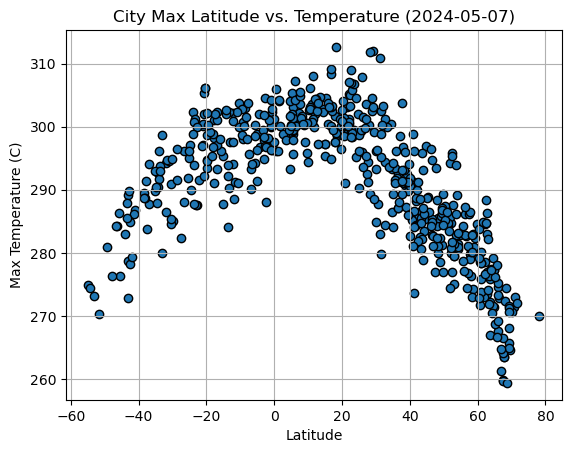

In [45]:
# Build scatter plot for latitude vs. temperature
# Create a Scatter Plot for temperature vs latitude
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values,y_values, edgecolors = 'black')

# Incorporate the other graph properties
plt.grid()
plt.title(f"City Max Latitude vs. Temperature ({datetime.datetime.utcfromtimestamp(city_date).strftime('%Y-%m-%d')})")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')

# Save the figure
plt.savefig("Output_Weather/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

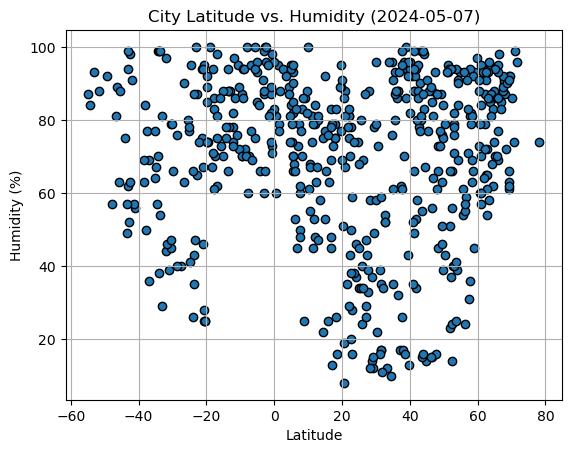

In [46]:
# Build scatter plot for latitude vs. temperature
# Create a Scatter Plot for temperature vs latitude
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values,y_values, edgecolors = 'black')

# Incorporate the other graph properties
plt.grid()
plt.title(f"City Latitude vs. Humidity ({datetime.datetime.utcfromtimestamp(city_date).strftime('%Y-%m-%d')})")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Save the figure
plt.savefig("Output_Weather/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

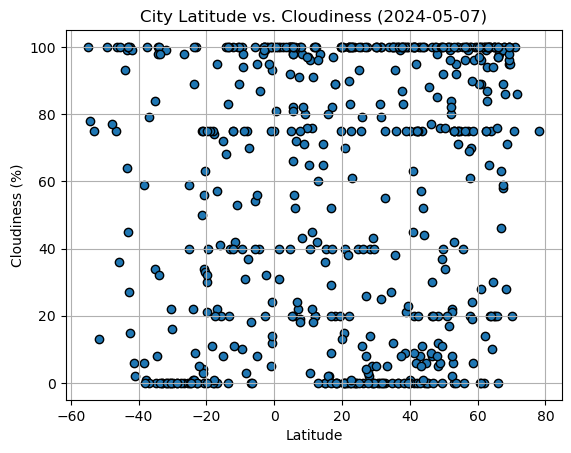

In [47]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values,y_values, edgecolors = 'black')

# Incorporate the other graph properties
plt.grid()
plt.title(f"City Latitude vs. Cloudiness ({datetime.datetime.utcfromtimestamp(city_date).strftime('%Y-%m-%d')})")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Save the figure
plt.savefig("Output_Weather/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

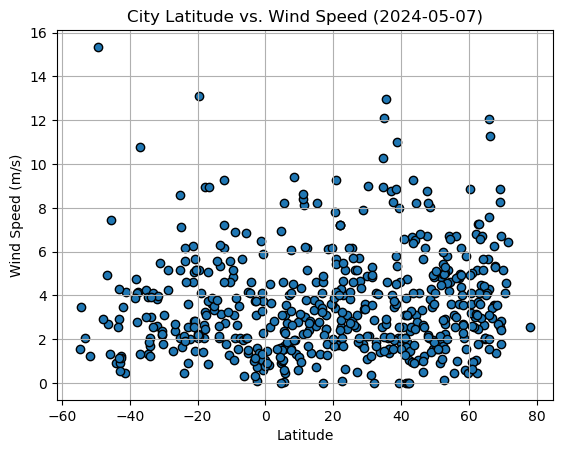

In [48]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values,y_values, edgecolors = 'black')

# Incorporate the other graph properties
plt.grid()
plt.title(f"City Latitude vs. Wind Speed ({datetime.datetime.utcfromtimestamp(city_date).strftime('%Y-%m-%d')})")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')

# Save the figure
plt.savefig("Output_Weather/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [55]:
# Define a function to create Linear Regression plots
def linear_regression_plots(x_values, y_values, x_label, y_label):
    # Perform linear regression
    slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept

    # Creating equation
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    # Create the scatter plot
    plt.scatter(x_values, y_values)
    
    # Plot the linear regression line
    plt.plot(x_values, regress_values, "r-")
    
    # Annotate the plot with the equation of the regression line and r-squared value
    plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=12, color="red")
    plt.annotate(f"R-squared = {round(rvalue**2, 2)}", (min(x_values), min(y_values) + 10), fontsize=12, color="red")
    
    # Set labels for the axes
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    # Display the plot
    plt.show()

In [53]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] > 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,thompson,55.7435,-97.8558,284.24,54,40,3.09,CA,1715053783
3,kapa'a,22.0752,-159.3190,301.14,81,100,7.20,US,1715053782
4,udachny,66.4167,112.4000,272.84,98,98,11.30,RU,1715053797
5,motygino,58.1831,94.7592,276.36,82,70,2.68,RU,1715054064
6,kodiak,57.7900,-152.4072,279.88,81,100,6.17,US,1715053784


In [54]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port-aux-francais,-49.3500,70.2167,280.97,92,100,15.35,TF,1715053777
2,invercargill,-46.4000,168.3500,284.27,89,100,2.68,NZ,1715053776
11,edinburgh of the seven seas,-37.0676,-12.3116,287.77,69,79,10.78,SH,1715053778
13,waitangi,-43.9535,-176.5597,283.05,75,93,0.89,NZ,1715053777
17,la breita,-4.2608,-80.8875,296.73,66,87,4.63,PE,1715054065


###  Temperature vs. Latitude Linear Regression Plot

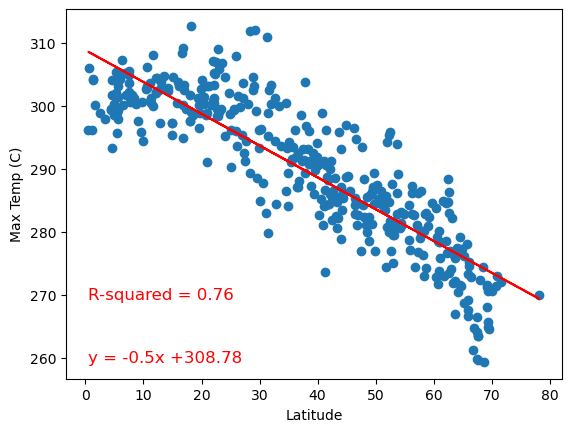

In [56]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
linear_regression_plots(x_values, y_values, 'Latitude', 'Max Temp (C)')


The r-value is: 0.7161472181434118


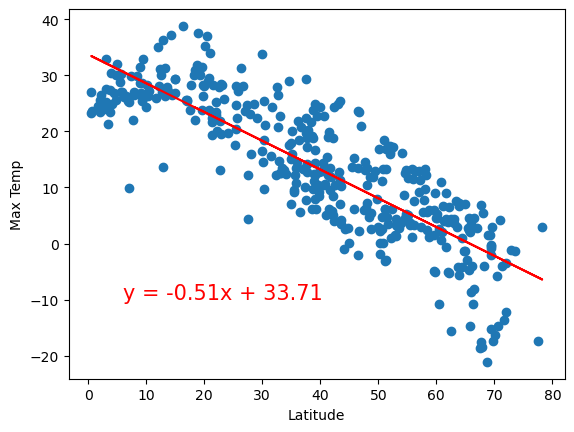

In [15]:
# Linear regression on Northern Hemisphere


The r-value is: 0.4121057168607245


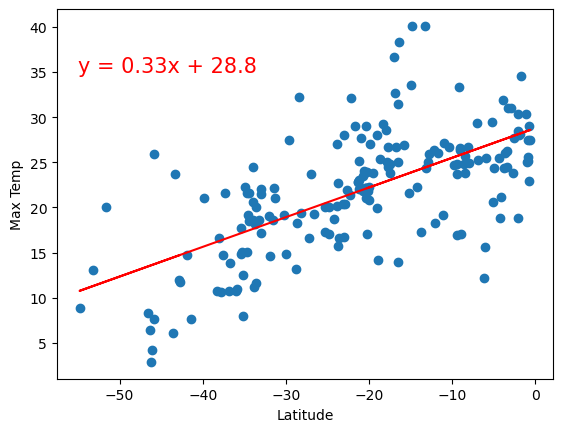

In [16]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05689741545789598


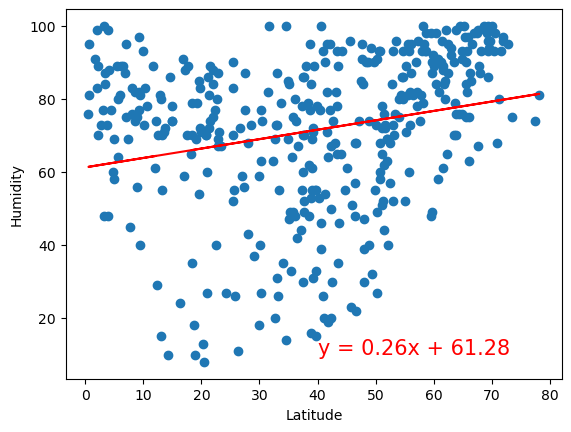

In [17]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.0002808747046324607


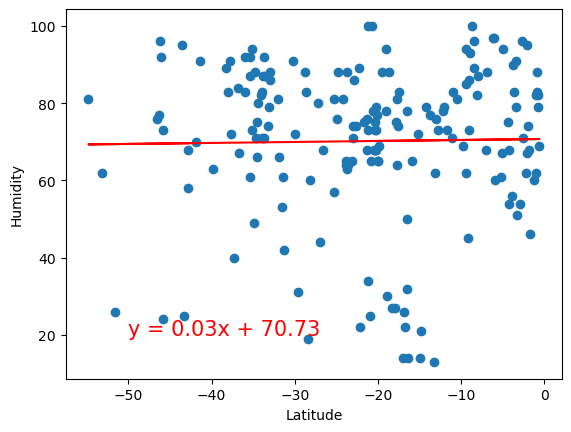

In [18]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811015


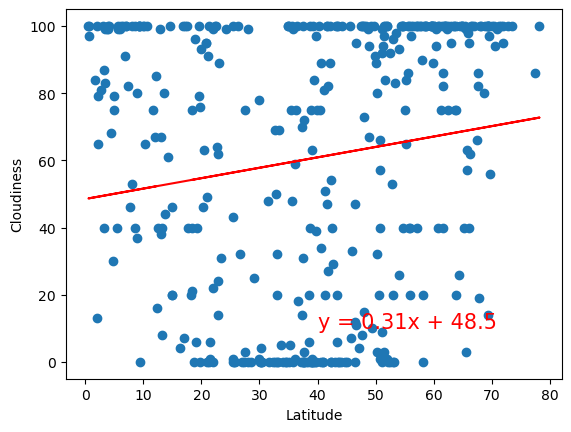

In [19]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.02056735429994368


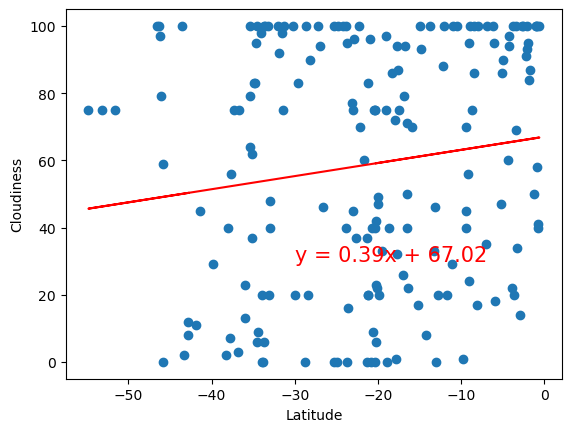

In [20]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


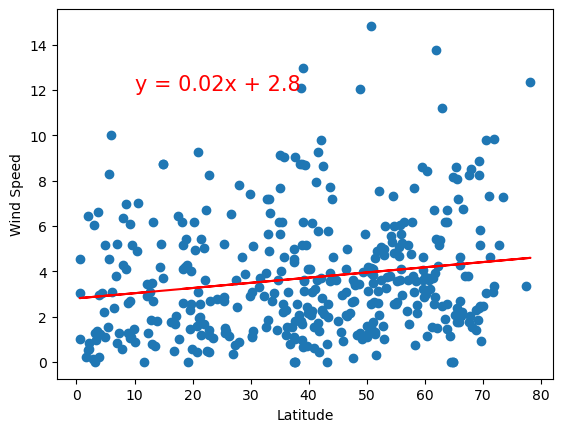

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.062239040700515696


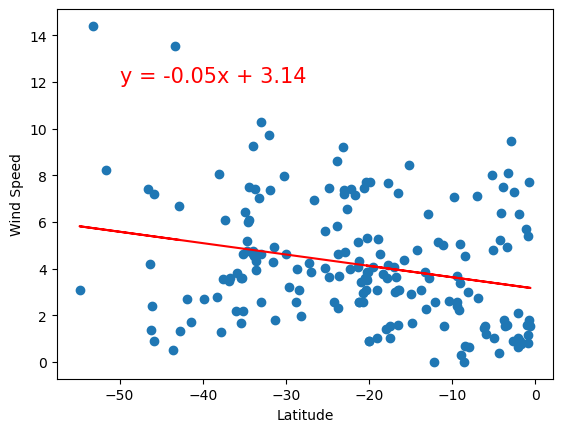

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE